**Tensorflow ile çalışan derin öğrenme modelinde her katman sonrası uygulanan filtre ile ayırt edilen özelliği görmek için yazılmıştır.**

In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

tensorflow için yazılmış Alexnet modeli;

In [3]:
model = tf.keras.models.Sequential([
                                    # layer 1
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3), name="conv_1"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(3, strides=(2,2), name="maxpooling_1"),
    # layer 2
  tf.keras.layers.Conv2D(256, (5,5),strides=(1,1), activation='relu',padding="same", name="conv_2"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(3, strides=(2,2), name="maxpooling_2"),
     # layer 3
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same", name="conv_3"),
  tf.keras.layers.BatchNormalization(),
    # layer 4
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same", name="conv_4"),
  tf.keras.layers.BatchNormalization(),
    # layer 5
  tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), activation='relu',padding="same", name="conv_5"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(3, strides=(2, 2), name="maxpooling_3"),

])

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 maxpooling_1 (MaxPooling2D)  (None, 27, 27, 96)       0         
                                                                 
 conv_2 (Conv2D)             (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                                 
 maxpooling_2 (MaxPooling2D)  (None, 13, 13, 256)     

input resimlerini ve size ayarlarını yapıyoruz.

In [27]:

img_single = tf.io.read_file("/content/drive/MyDrive/kedi.jpg")

img_single = tf.io.decode_jpeg(img_single, channels=0)

img_single = tf.image.convert_image_dtype(img_single, dtype=tf.float32)

img_single = tf.image.resize(img_single, [227,227])


img_single = tf.reshape(img_single, [1, 227, 227, 3])
print(img_single.shape)


(1, 227, 227, 3)


In [28]:
prediction = model.predict(img_single)
prediction[0].shape

(6, 6, 256)

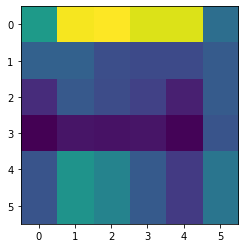

In [32]:
import matplotlib.pyplot as plt
plt.imshow(prediction[0][:,:,252])  #son filtreden çıkan [6,6,256] boyutundaki filtre çıktılarını burada görüyoruz.
plt.show()

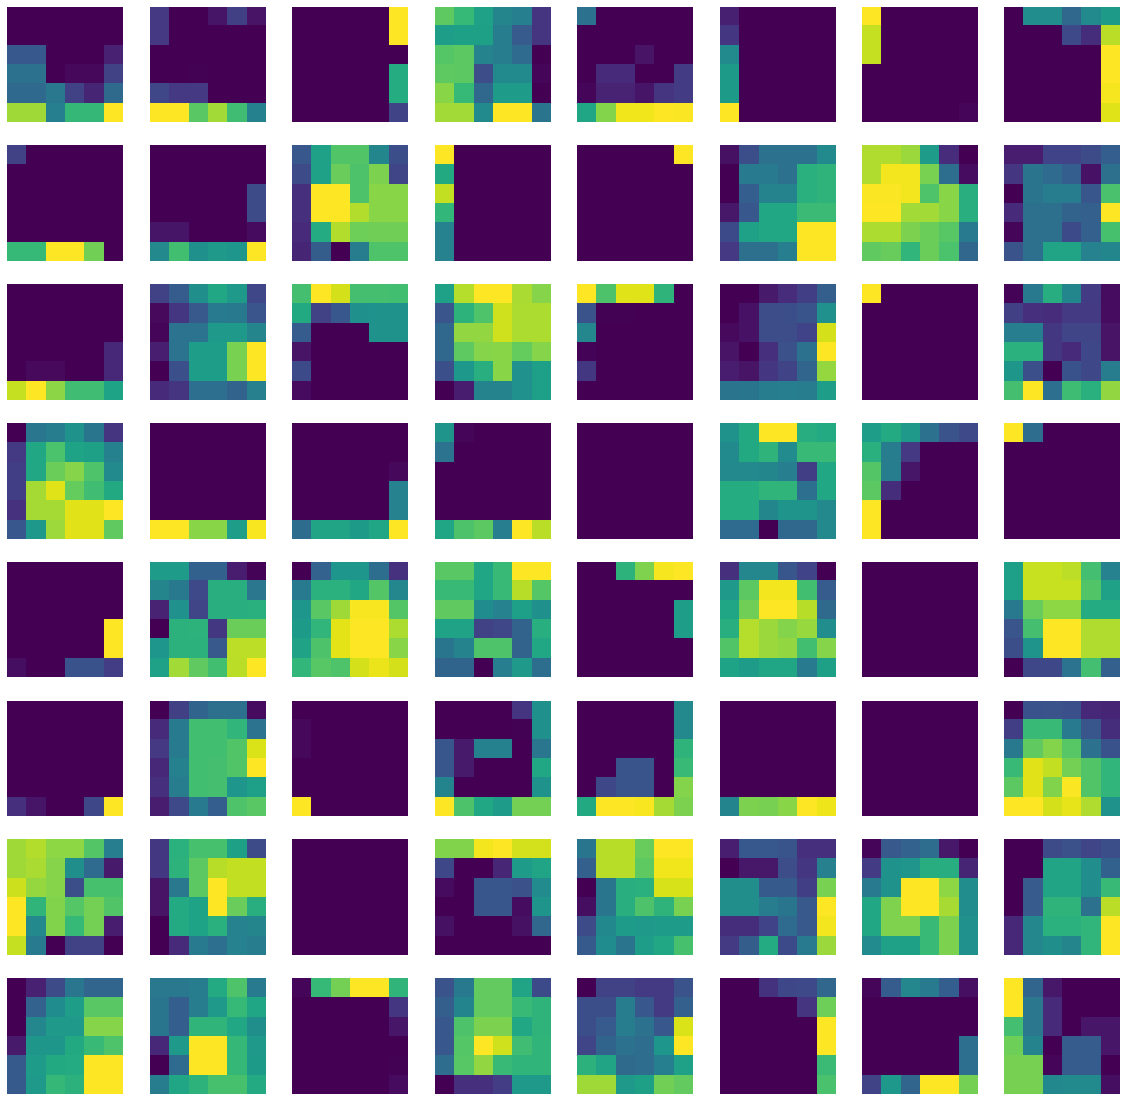

In [25]:
filter_count = 64
index = 1
plt.figure(figsize=(20,20))
for _ in range(8):
  for _ in range(8):
    plt.subplot(8,8,index)
    plt.axis("off")
    plt.imshow(prediction[0, :, :, index-1 ])
    index +=1